In [1]:
pip install -r /config/workspace/requirements.txt

     |████████████████████████████████| 9.2 MB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 479.6 MB 22 kB/s s eta 0:00:01     |████████████████████████████▊   | 431.1 MB 501 kB/s eta 0:01:37
  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     |████████████████████████████████| 11.1 MB 505 kB/s eta 0:00:011
     |████████████████████████████████| 3.5 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 67.9 MB/s eta 0:00:01
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     |████████████████████████████████| 17.3 MB 483 kB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 33 kB/s eta 0:00:0121
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |██████

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-12-08 17:02:35.039900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 17:02:35.112842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 17:02:35.114146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 17:02:36.683856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1


In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape,test_images.shape,len(train_images)

((60000, 28, 28), (10000, 28, 28), 60000)

In [6]:
train_images;

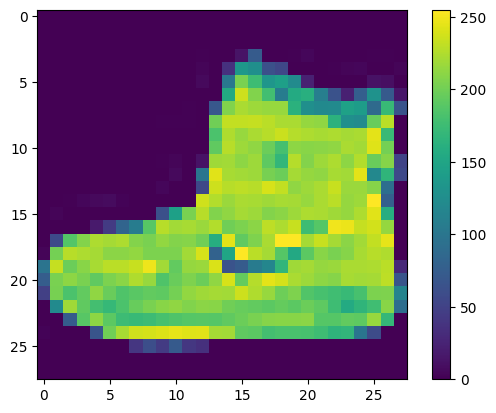

In [7]:
##  processing the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
## Scaling the image data
train_images= train_images/255
train_images=train_images/255

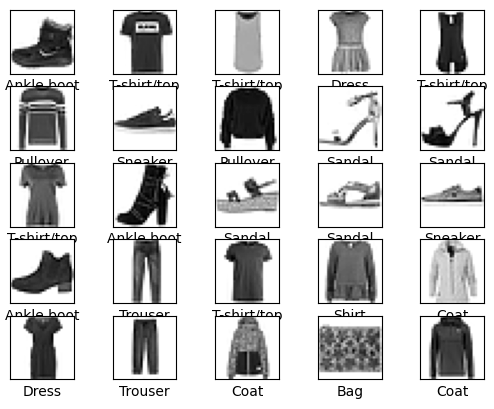

In [9]:
plt.Figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_images[0].shape

(28, 28)

In [11]:
## Building the model

## Setting the layers

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
## Compiling the model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
## traning the model

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1005 - accuracy: 0.6551
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6430 - accuracy: 0.7706
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5673 - accuracy: 0.7969
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5264 - accuracy: 0.8148
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4994 - accuracy: 0.8224
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4802 - accuracy: 0.8307
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4655 - accuracy: 0.8354
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4538 - accuracy: 0.8401
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4440 - accuracy: 0.8432
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.435

In [14]:
## Evaluate the accuracy

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 22334.3184 - accuracy: 0.6990 - 544ms/epoch - 2ms/step


In [15]:
## making the predictions


# With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.


In [16]:
probability_model=tf.keras.Sequential([
    model,tf.keras.layers.Softmax()
])

In [17]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [18]:
predictions[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
## Defining the function to grapf the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') 

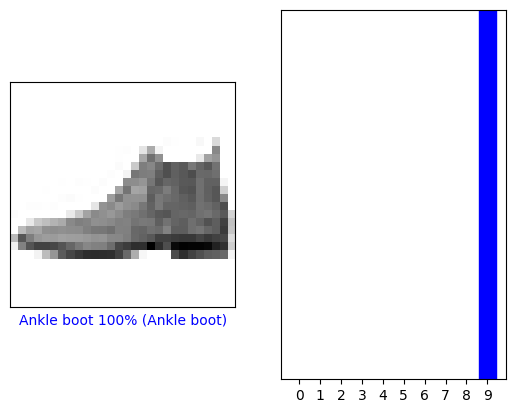

In [22]:
## Verify the predictions

i=0
plt.Figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

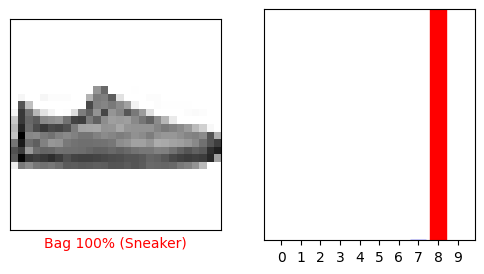

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

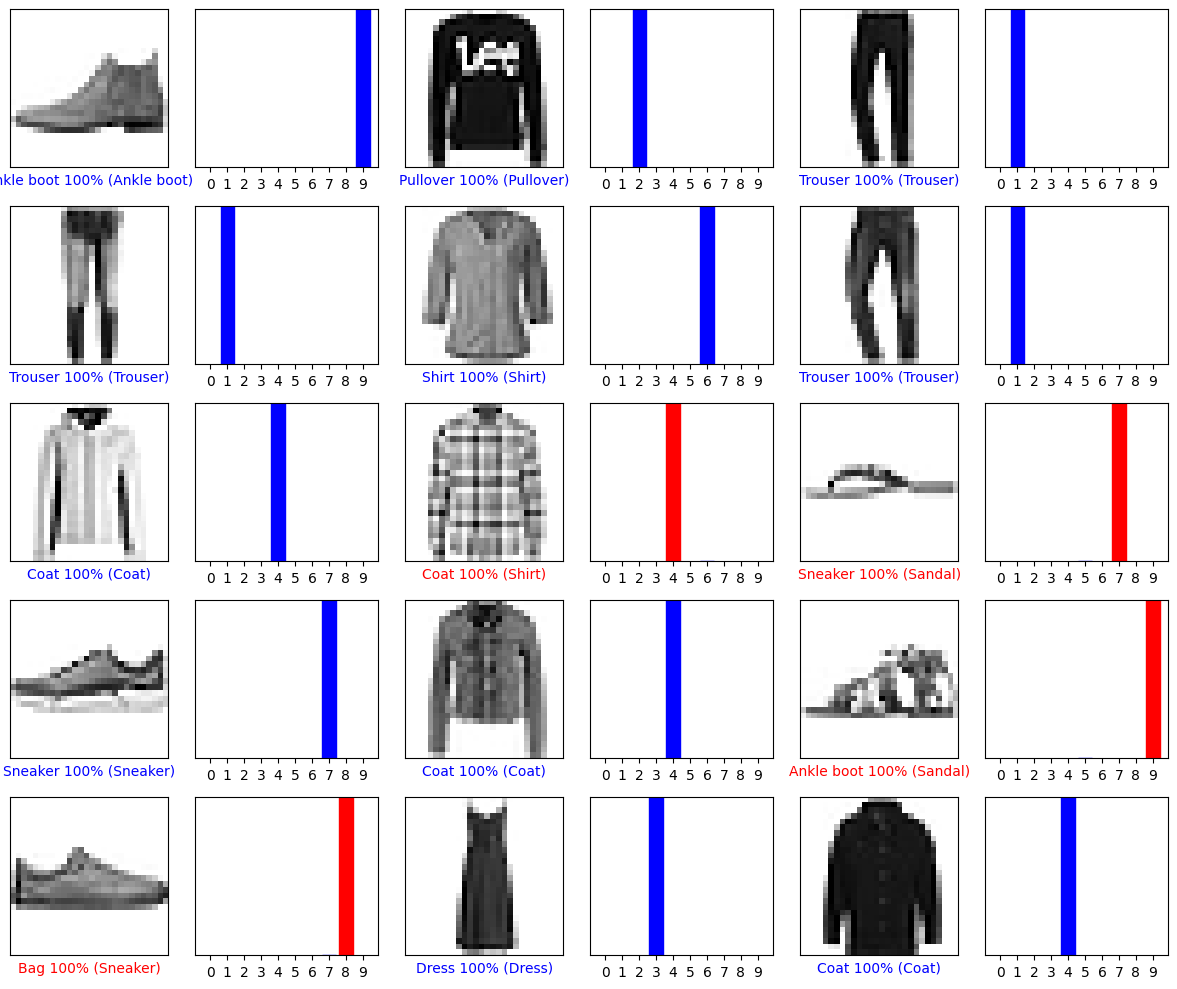

In [24]:
## Let's plot several images with their predictions. Note that the model can be wrong even when very confident

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 45ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


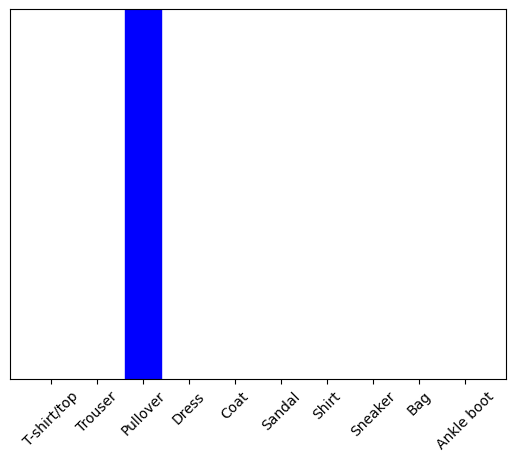

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2

(<matplotlib.image.AxesImage at 0x7f1099e424c0>, 9, 'Ankle boot')

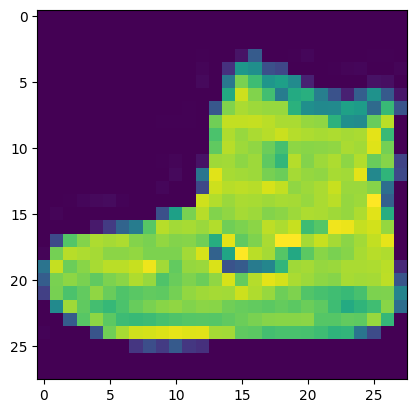

In [30]:
plt.imshow(train_images[0]),train_labels[0],class_names[train_labels[0]]

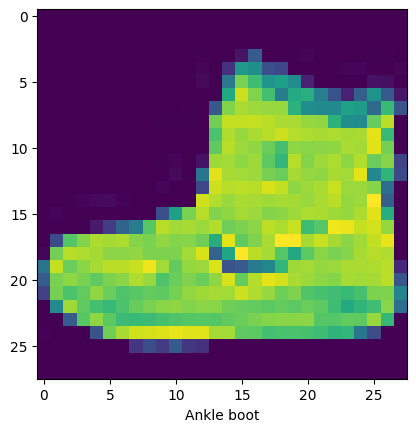

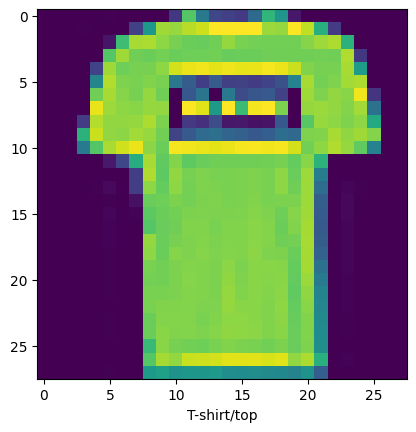

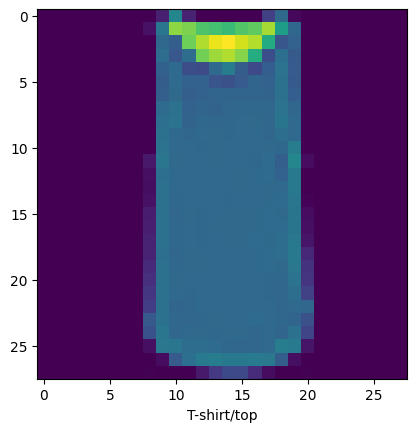

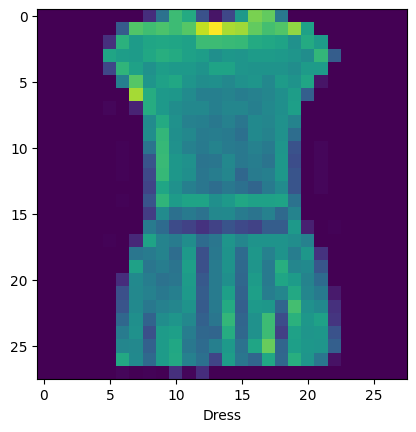

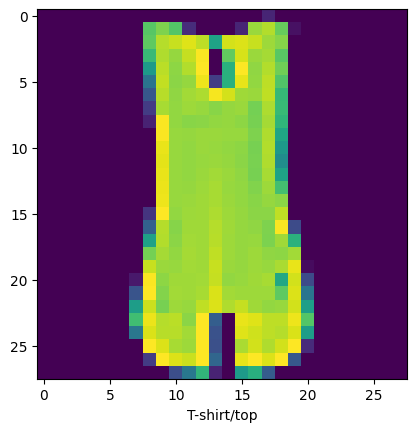

In [31]:
plt.Figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [32]:
s_t=train_images.reshape(len(train_images),-1)
s_t.shape[1]
import tensorflow.keras as keras
def get_model(train_images,hidden_layes=1):
    layers=[]
    train_images=train_images.reshape(len(train_images),-1)
    model=keras.Sequential()
    for _ in range(hidden_layes):
        model.add(tf.keras.layers.Dense(10,input_shape=(train_images.shape[1],),activation='sigmoid'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [33]:
# print(train_images.s)
get_model(train_images)

In [34]:
train_images.shape

(60000, 28, 28)

In [35]:
# train_images=train_images.reshape(len(train_images),-1)
# train_images.shape

In [36]:
def get_model(hidden_layes=1):
    # flatten the layer for the input
    layers=[keras.layers.Flatten(input_shape=(28,28))]
    ## Adding the hidden layers
    for i in range(hidden_layes):
        layers.append(keras.layers.Dense(500,activation='relu'))

    ## adding the output layers
    layers.append(keras.layers.Dense(10,activation='sigmoid'))

    ## Creating the model from the list of layers that we have created

    model=keras.Sequential(layers)

    # Compiling the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [39]:
## Creating the model and finetuning the model with the data
model=get_model(1)
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8695 - accuracy: 0.7078
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5446 - accuracy: 0.8061
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4862 - accuracy: 0.8279
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4552 - accuracy: 0.8392
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4358 - accuracy: 0.8456


In [42]:
## Predicting the output using the model
model.predict(test_images)[2]

313/313 [==============================] - 1s 2ms/step


array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
test_labels[2]

1

In [46]:
import timeit
## Epochs performance comparesion


In [48]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8854 - accuracy: 0.7073
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5522 - accuracy: 0.8035
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4926 - accuracy: 0.8250
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4617 - accuracy: 0.8369
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4404 - accuracy: 0.8435
40 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8756 - accuracy: 0.7125
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5479 - accuracy: 0.8056
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4877 - accuracy: 0.8274
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4560 - accuracy: 0.8389
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4354 - accuracy: 0.8468
40.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [50]:
## Comparing the performance with 5 hidden layers

In [51]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.7131 - accuracy: 0.7269
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4596 - accuracy: 0.8321
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4145 - accuracy: 0.8483
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3844 - accuracy: 0.8594
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3613 - accuracy: 0.8677
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6949 - accuracy: 0.7356
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4711 - accuracy: 0.8283
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4119 - accuracy: 0.8488
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3826 - accuracy: 0.8578
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3610 - accuracy: 0.8674
1min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
